# Exercise 11 - Convolutional Neural Network

## Tasks
- Familiarize yourself with PyTorch CNN syntax

## Learning Goals
- Observe the impact of different convolutional filters on an input image
- Familarize yourself with PyTorch's syntax for convolutional neural networks

Note: within Convolutional Neural Networks, the filters are learnable. Here they are specified.

In [31]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

**data preparation**

In [32]:
image = Image.open("logo ufabc.jpeg")
data = np.asarray(image)
print("shape of data:", data.shape)

rgbWeights = [0.2989, 0.5870, 0.1140]
data = np.dot(data[..., :3], rgbWeights)  # convert to gray scale
print("shape of data:", data.shape)

data = torch.from_numpy(data).unsqueeze(0).unsqueeze(0).to(torch.float32)
print("shape of data:", data.shape)

shape of data: (484, 474, 3)
shape of data: (484, 474)
shape of data: torch.Size([1, 1, 484, 474])


**helper function, which converts torch tensors to filters** (models consisting of a single convolutional filter)

In [33]:
def makeFilter(input):
    filter = torch.nn.Conv2d(
        1, 1, kernel_size=input.shape[-1], stride=1, padding=0, bias=False
    )  # assumes a square filter
    filter.weight.data = input
    return filter

**original image**

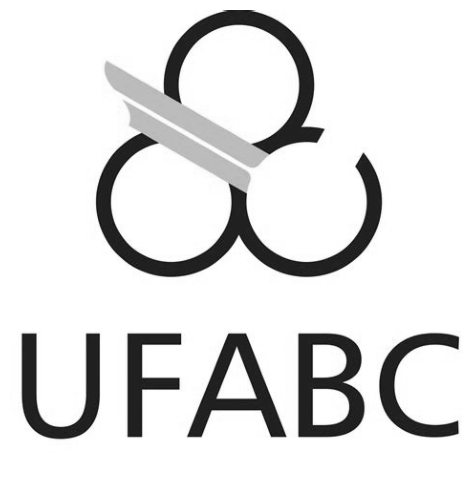

In [34]:
plt.figure(figsize=(12, 6))
plt.imshow(data.squeeze(), cmap="gray")
plt.axis("off")
plt.show()

**apply a** $3\times 3$ ***Gaussian* filter**
$$
    \text{filter} = \frac{1}{16}\left[
        \begin{array}{ccc}
            1 & 2 & 1 \\
            2 & 4 & 2 \\
            1 & 2 & 1
        \end{array}
    \right]
$$
**to the image**

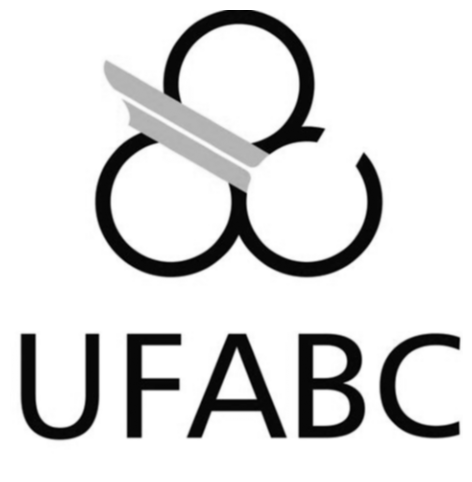

In [35]:
gaussianFilter3By3 = makeFilter(
    torch.tensor([[[[1.0, 2.0, 1.0], [2.0, 4.0, 2.0], [1.0, 2.0, 1.0]]]]) / 16.0
)

output = gaussianFilter3By3(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(output.squeeze(), cmap="gray")
plt.axis("off")
plt.show()

**apply a** $5\times 5$ ***Gaussian* filter**
$$
    \text{filter} = \frac{1}{159}\left[
        \begin{array}{ccccc}
            2 & 4 & 5 & 2 & 2 \\
            4 & 9 & 12 & 9 & 4 \\
            5 & 12 & 15 & 12 & 5 \\
            4 & 9 & 12 & 9 & 4 \\
            2 & 4 & 5 & 2 & 2
        \end{array}
    \right]
$$
**to the image**

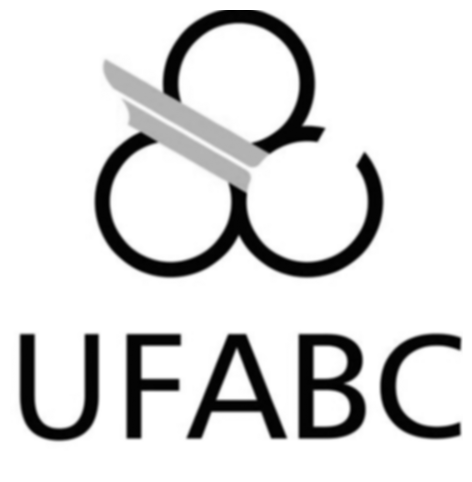

In [ ]:
gaussianFilter5By5 = makeFilter(
    torch.tensor(
        [
            [
                [
                    [2.0, 4.0, 5.0, 4.0, 2.0],
                    [4.0, 9.0, 12.0, 9.0, 4.0],
                    [5.0, 12.0, 15.0, 12.0, 5.0],
                    [4.0, 9.0, 12.0, 9.0, 4.0],
                    [2.0, 4.0, 5.0, 4.0, 2.0],
                ]
            ]
        ]
    )
    / 159.0
)

output = gaussianFilter5By5(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(output.squeeze(), cmap="gray")
plt.axis("off")
plt.show()

**apply a *Sobel* filter in the** $x$-**direction to obtain that discreet derivative** 
$$
    \text{filter} = \left[
        \begin{array}{ccc}
            -1 & 0 & 1 \\
            -2 & 0 & 2 \\
            -1 & 0 & 1
        \end{array}
    \right]
$$
**to the image**

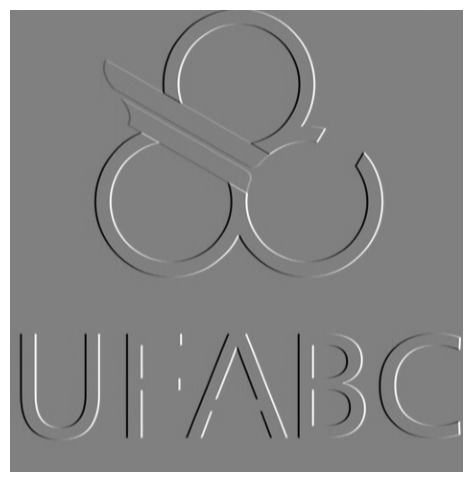

In [37]:
sobelxFilter = makeFilter(
    torch.tensor([[[[-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0], [-1.0, 0.0, 1.0]]]])
)

outputx = sobelxFilter(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(outputx.squeeze(), cmap="gray")
plt.axis("off")
plt.show()

**apply a *Sobel* filter in the** $y$-**direction to obtain that discreet derivative**
$$
    \text{filter} = \left[
        \begin{array}{ccc}
            -1 & -2 & -1 \\
            0 & 0 & 0 \\
            1 & 2 & 1
        \end{array}
    \right]
$$
**to the image**

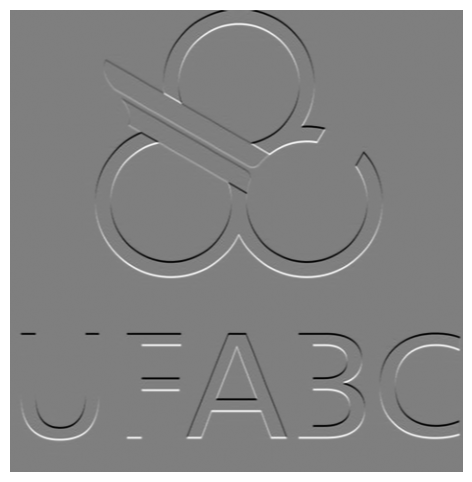

In [38]:
sobelyFilter = makeFilter(
    torch.tensor([[[[-1.0, -2.0, -1.0], [0.0, 0.0, 0.0], [1.0, 2.0, 1.0]]]])
)

outputy = sobelyFilter(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(outputy.squeeze(), cmap="gray")
plt.axis("off")
plt.show()

**get the gradient magnitude from the image**

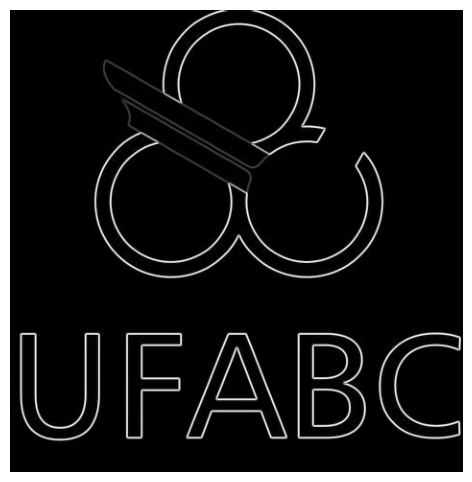

In [39]:
gradientMagnitude = torch.sqrt(outputx ** 2 + outputy ** 2)

plt.figure(figsize=(12, 6))
plt.imshow(gradientMagnitude.squeeze(), cmap="gray")
plt.axis("off")
plt.show()

**Aprendizado sobre a utilidade da prática**

Essa prática permite compreender, de maneira intuitiva e visual, o efeito direto de diferentes filtros convolucionais sobre uma imagem. Ao utilizar filtros clássicos como Gaussian Blur e Sobel, observa-se como operações simples de convolução podem extrair características específicas, como bordas e contornos, ou suavizar a imagem, reduzindo ruídos. O uso manual de filtros ajuda a entender a estrutura de dados que a biblioteca PyTorch exige para aplicar convoluções, como o formato de tensores e o papel dos parâmetros da camada Conv2d. Essencial para quem está trabalhando com visão computacional, pois fornece uma base sólida antes de introduzir o treinamento de redes.

**Compreensão geral sobre CNNs**

As Redes Neurais Convolucionais (CNNs) são modelos projetados para processar dados que possuem uma estrutura de grade, como imagens. O componente central de uma CNN é a operação de convolução, que aplica filtros (kernels) sobre a entrada para extrair características locais, como texturas, contornos e padrões. Ao contrário desta prática, em modelos reais os filtros são aprendidos automaticamente durante o processo de treinamento, ajustando-se aos dados para otimizar uma tarefa específica, como classificação ou detecção de objetos. Essa característica permite que as CNNs sejam altamente eficazes e escaláveis para problemas de visão computacional, oferecendo desempenho superior em tarefas que exigem percepção visual detalhada.